In [43]:
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_key import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [24]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

In [34]:
# Starting URL for API calls
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Make lists to put corresponding retrieved data into
city_names = []
temperatures = []
cloudiness = []
humidity = []
wind_speed = []
countries = []
lats = []
lngs = []
dates = []

# Initialize counter for retrievals
counter = 1

for city in cities:
    try:
        response = requests.get(f"{url}&q={city}").json()
        city_names.append(response["name"])
        temperatures.append(response["main"]["temp_max"])
        cloudiness.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
        wind_speed.append(response["wind"]["speed"])
        countries.append(response["sys"]["country"])
        lats.append(response["coord"]["lat"])
        lngs.append(response["coord"]["lon"])
        dates.append(response["dt"])
        record = response["name"]
        print(f"Processing Record {counter} | {record}")
        print(f"{url}&q={city}")
        
        counter += 1
        
        time.sleep(1.01)
    except:
        print("Record not found, continuing")
    continue

Processing Record 1 | Punta Arenas
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=punta%20arenas
Processing Record 2 | Kamaishi
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=kamaishi
Processing Record 3 | Chumikan
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=chumikan
Processing Record 4 | Henties Bay
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=henties%20bay
Processing Record 5 | Pangnirtung
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=pangnirtung
Processing Record 6 | Busselton
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=busselton
Processing Record 7 | Pisco
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcf

Record not found, continuing
Processing Record 57 | Saint Petersburg
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=petropolis
Processing Record 58 | Laguna
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=laguna
Processing Record 59 | Nuevo Progreso
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=nuevo%20progreso
Processing Record 60 | Buraidah
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=buraydah
Processing Record 61 | Qaanaaq
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=qaanaaq
Processing Record 62 | Gouyave
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=gouyave
Processing Record 63 | Kapoeta
https://api.openweathermap.org/data/2.5/weather?units=

Processing Record 112 | Hokitika
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=hokitika
Record not found, continuing
Processing Record 113 | Sicuani
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=sicuani
Processing Record 114 | Linqiong
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=linqiong
Processing Record 115 | Vrangel'
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=vrangel
Processing Record 116 | Sørland
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=sorland
Processing Record 117 | São Paulo de Olivença
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=sao%20paulo%20de%20olivenca
Processing Record 118 | Nova Viçosa
https://api.openweathermap.org/d

Processing Record 168 | Serik
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=serik
Processing Record 169 | Menongue
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=menongue
Processing Record 170 | Yeppoon
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=yeppoon
Processing Record 171 | São Filipe
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=sao%20filipe
Processing Record 172 | Thompson
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=thompson
Record not found, continuing
Processing Record 173 | Butaritari
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=butaritari
Processing Record 174 | Esim
https://api.openweathermap.org/data/2.5/weather?units=Imperial&A

Processing Record 223 | Bako
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=bako
Processing Record 224 | Zhigansk
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=zhigansk
Record not found, continuing
Processing Record 225 | Tasiilaq
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=tasiilaq
Processing Record 226 | Saint-François
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=saint-francois
Processing Record 227 | Kruisfontein
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=kruisfontein
Processing Record 228 | Williams Lake
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=williams%20lake
Processing Record 229 | Sassandra
https://api.openweathermap.org/data/2

Processing Record 278 | Broome
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=broome
Processing Record 279 | Tateyama
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=tateyama
Processing Record 280 | Iracoubo
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=iracoubo
Processing Record 281 | Philadelphia
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=filadelfia
Processing Record 282 | Shādegān
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=shadegan
Processing Record 283 | Auki
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=auki
Processing Record 284 | Mandalgovi
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f3776

Processing Record 333 | Altus
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=altus
Processing Record 334 | Yarensk
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=yarensk
Processing Record 335 | Boa Vista
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=boa%20vista
Processing Record 336 | Gravdal
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=gravdal
Processing Record 337 | Torbay
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=torbay
Processing Record 338 | Saran
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=saran
Processing Record 339 | Kutum
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=kutum


Processing Record 389 | Doha
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=doha
Processing Record 390 | Humaitá
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=humaita
Processing Record 391 | Talcahuano
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=talcahuano
Processing Record 392 | Bara
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=bara
Processing Record 393 | Mercedes
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=mercedes
Processing Record 394 | Ahar
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=ahar
Processing Record 395 | Mabaruma
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=mabaruma


Processing Record 445 | Qaryat Sulūq
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=suluq
Processing Record 446 | Yagodnoye
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=yagodnoye
Processing Record 447 | Kenora
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=kenora
Processing Record 448 | Kantemirovka
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=kantemirovka
Processing Record 449 | Krotovka
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=krotovka
Processing Record 450 | Newport
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=newport
Processing Record 451 | Mel'nikovo
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7

Processing Record 500 | El Tarra
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=el%20tarra
Processing Record 501 | Gweta
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=gweta
Processing Record 502 | Jevnaker
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=jevnaker
Processing Record 503 | Red Bluff
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=red%20bluff
Processing Record 504 | Mingshui
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=mingshui
Processing Record 505 | Grenville
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=grenville
Record not found, continuing
Processing Record 506 | Manado
https://api.openweathermap.org/data/2.5/weather?units=Imperial

Record not found, continuing
Processing Record 555 | Chivay
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=chivay
Processing Record 556 | Hajnówka
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=hajnowka
Processing Record 557 | San Juan
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=san%20juan
Processing Record 558 | Nacala
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=nacala
Processing Record 559 | Kassala
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=kassala
Processing Record 560 | Jiangdu
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd56d305bcfb7fbcb86f377604d58c&q=jiangdu
Processing Record 561 | Lompoc
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ecd5

In [37]:
# Create a dictionary of all the weather attributes collected for the cities
weather_atts = {
    "City": city_names,
    "Max Temp": temperatures,
    "Cloudiness": cloudiness,
    "Humidity": humidity,
    "Wind Speed": wind_speed,
    "Country": countries,
    "Latitude": lats,
    "Longitude": lngs,
    "Date": dates
        }

# Put the attributes in a data frame
weather_atts_df = pd.DataFrame(weather_atts)
weather_atts_df

,City,Max Temp,Cloudiness,Humidity,Wind Speed,Country,Latitude,Longitude,Date
0,Punta Arenas,46.40,75,66,21.85,CL,-53.1500,-70.9167,1611788886
1,Kamaishi,33.51,100,83,4.32,JP,39.2667,141.8833,1611788887
2,Chumikan,-13.14,100,88,8.72,RU,54.7183,135.3150,1611788888
3,Henties Bay,68.00,6,85,6.13,NA,-22.1160,14.2845,1611788889
4,Pangnirtung,-4.00,1,77,4.61,CA,66.1451,-65.7125,1611788890
...,...,...,...,...,...,...,...,...,...
558,Kassala,70.88,61,58,5.95,SD,15.4510,36.4000,1611789526
559,Jiangdu,42.01,18,94,14.85,CN,32.4286,119.5574,1611789527
560,Lompoc,53.60,90,87,14.97,US,34.6391,-120.4579,1611789325
561,Honāvar,70.32,2,71,3.56,IN,14.2833,74.4500,1611789529


In [44]:
# Save to csv
weather_atts_df.to_csv(output_data_file)

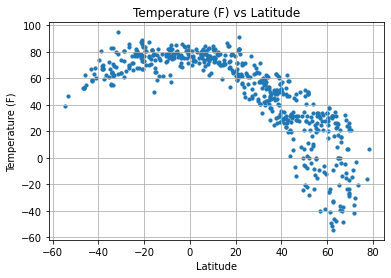

In [104]:
# Plot Temperature in Farenheit vs Latitude
plt.scatter(weather_atts_df["Latitude"], weather_atts_df["Max Temp"], marker = "o", s = 10)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature (F) vs Latitude")

# As latitude approaches 0, i.e. the equator, temperature increases

plt.savefig("../../output_data/templat.png")

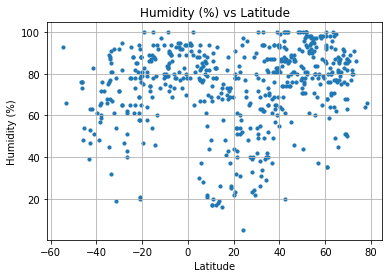

In [103]:
# Plot Humidity in percent vs Latitude
plt.scatter(weather_atts_df["Latitude"], weather_atts_df["Humidity"], marker = "o", s = 10)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity (%) vs Latitude")

# There seems to be no relationship between humidity and latitude

plt.savefig("../../output_data/humlat.png")

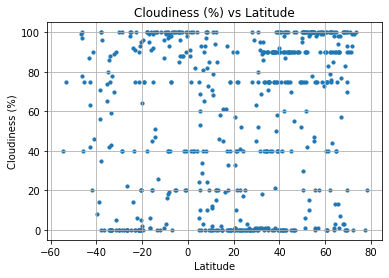

In [105]:
# Plot Cloudiness in percent vs Latitude
plt.scatter(weather_atts_df["Latitude"], weather_atts_df["Cloudiness"], marker = "o", s = 10)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness (%) vs Latitude")

# There seems to be no relationship between cloudiness and latitude

plt.savefig("../../output_data/cloudlat.png")

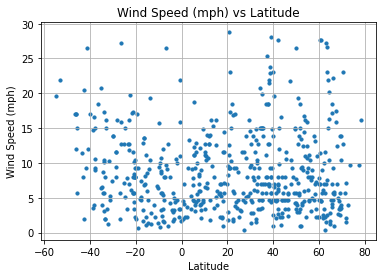

In [106]:
# Plot Wind speed in mph vs Latitude
plt.scatter(weather_atts_df["Latitude"], weather_atts_df["Wind Speed"], marker = "o", s = 10)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed (mph) vs Latitude")

# There seems to be no relationship between wind speed and latitude

plt.savefig("../../output_data/windlat.png")

In [75]:
# Locate cities above or equal to 0 latitude and below 0 latitude
northern_cities = weather_atts_df[weather_atts_df.loc[:, "Latitude"] >= 0]
southern_cities = weather_atts_df[weather_atts_df.loc[:, "Latitude"] < 0]

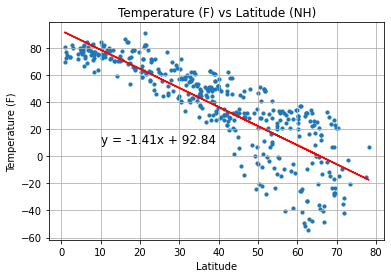

In [107]:
# Plot Temperature (F) vs Latitude with linear regression for northern hemisphere
plt.scatter(northern_cities["Latitude"], northern_cities["Max Temp"], marker = "o", s = 10)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature (F) vs Latitude (NH)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_cities["Latitude"], northern_cities["Max Temp"])
regress_values = northern_cities["Latitude"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(10,10),fontsize=12,color="black")
plt.plot(northern_cities["Latitude"],regress_values,"r-")

plt.savefig("../../output_data/templatnh.png")

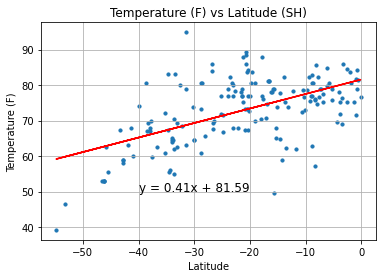

In [108]:
# Plot Temperature (F) vs Latitude with linear regression for southern hemisphere
plt.scatter(southern_cities["Latitude"], southern_cities["Max Temp"], marker = "o", s = 10)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature (F) vs Latitude (SH)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_cities["Latitude"], southern_cities["Max Temp"])
regress_values = southern_cities["Latitude"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(-40,50),fontsize=12,color="black")
plt.plot(southern_cities["Latitude"],regress_values,"r-")

plt.savefig("../../output_data/templatsh.png")

# Trend #1 temperature and latitude: As latitude increases in the northern hemisphere, temperature decreases. As latitude increases in the southern hemisphere, temperature increases. This makes sense in relation to distance from the equator.

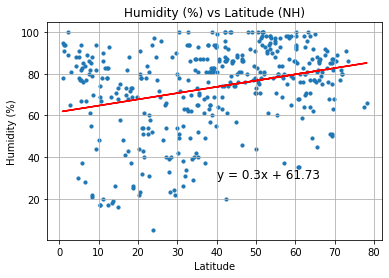

In [109]:
# Plot Humidity (%) vs Latitude with linear regression for northern hemisphere
plt.scatter(northern_cities["Latitude"], northern_cities["Humidity"], marker = "o", s = 10)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity (%) vs Latitude (NH)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_cities["Latitude"], northern_cities["Humidity"])
regress_values = northern_cities["Latitude"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(40,30),fontsize=12,color="black")
plt.plot(northern_cities["Latitude"],regress_values,"r-")

plt.savefig("../../output_data/humlatnh.png")

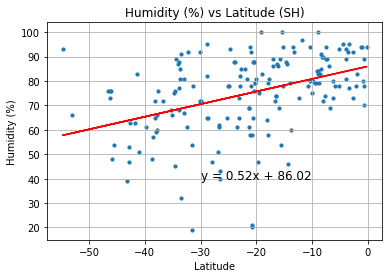

In [110]:
# Plot Humidity (%) vs Latitude with linear regression for southern hemisphere
plt.scatter(southern_cities["Latitude"], southern_cities["Humidity"], marker = "o", s = 10)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity (%) vs Latitude (SH)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_cities["Latitude"], southern_cities["Humidity"])
regress_values = southern_cities["Latitude"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(-30,40),fontsize=12,color="black")
plt.plot(southern_cities["Latitude"],regress_values,"r-")

# The plots slightly suggest that as latitude increases, humidity increases, but there doesn't seem to be much of a relationship

plt.savefig("../../output_data/humlatsh.png")

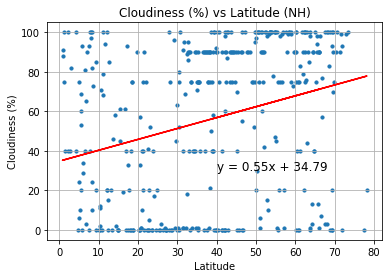

In [111]:
# Plot Cloudiness (%) vs Latitude with linear regression for northern hemisphere
plt.scatter(northern_cities["Latitude"], northern_cities["Cloudiness"], marker = "o", s = 10)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness (%) vs Latitude (NH)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_cities["Latitude"], northern_cities["Cloudiness"])
regress_values = northern_cities["Latitude"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(40,30),fontsize=12,color="black")
plt.plot(northern_cities["Latitude"],regress_values,"r-")

plt.savefig("../../output_data/cloudlatnh.png")

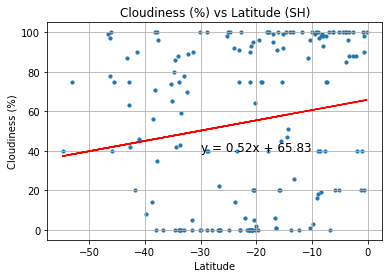

In [112]:
# Plot Cloudiness (%) vs Latitude with linear regression for southern hemisphere
plt.scatter(southern_cities["Latitude"], southern_cities["Cloudiness"], marker = "o", s = 10)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness (%) vs Latitude (SH)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_cities["Latitude"], southern_cities["Cloudiness"])
regress_values = southern_cities["Latitude"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(-30,40),fontsize=12,color="black")
plt.plot(southern_cities["Latitude"],regress_values,"r-")

plt.savefig("../../output_data/cloudlatsh.png")

# Trend #2 cloudiness and latitude: The plots suggest that as latitude increases, cloudiness increases, but there doesn't seem to be much of a relationship for either hemisphere.

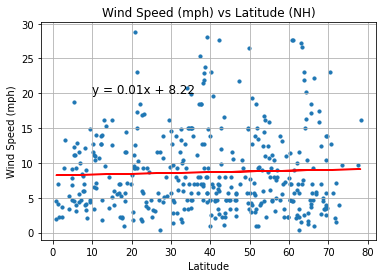

In [113]:
# Plot Wind speed (mph) vs Latitude with linear regression for northern hemisphere
plt.scatter(northern_cities["Latitude"], northern_cities["Wind Speed"], marker = "o", s = 10)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed (mph) vs Latitude (NH)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_cities["Latitude"], northern_cities["Wind Speed"])
regress_values = northern_cities["Latitude"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(10,20),fontsize=12,color="black")
plt.plot(northern_cities["Latitude"],regress_values,"r-")

plt.savefig("../../output_data/windlatnh.png")

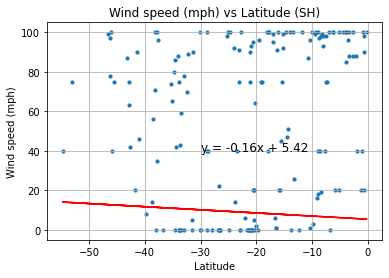

In [114]:
# Plot Wind speed (mph) vs Latitude with linear regression for southern hemisphere
plt.scatter(southern_cities["Latitude"], southern_cities["Cloudiness"], marker = "o", s = 10)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind speed (mph)")
plt.title("Wind speed (mph) vs Latitude (SH)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_cities["Latitude"], southern_cities["Wind Speed"])
regress_values = southern_cities["Latitude"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(-30,40),fontsize=12,color="black")
plt.plot(southern_cities["Latitude"],regress_values,"r-")

plt.savefig("../../output_data/windlatsh.png")

# Trend #3 wind speed and latitude: There is next to no relationship for wind speed and latitude for either hemisphere